## MNIST 손글씨 분류 - 신경망

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

#### 데이터 전처리

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() # tuple 형태
X_train.shape, X_test.shape, y_train.shape, y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

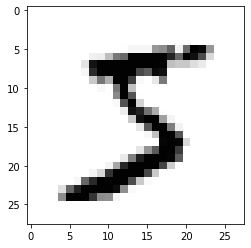

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

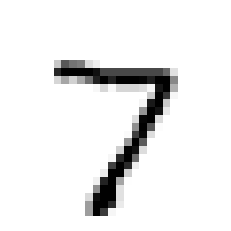

In [9]:
plt.imshow(X_test[0], cmap='Greys'); plt.axis('off');

In [11]:
import sys    # mnist 에선 값이 작을수록 밝은색
for row in X_train[0]:
  for x in row:
    sys.stdout.write(f'{x:3d}')
  sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [12]:
type(X_train), X_train.dtype #unit8 : unsigned int 8bit (0~255)

(numpy.ndarray, dtype('uint8'))

In [13]:
# 0 ~ 1 사이의 값으로 정규화
X_train = X_train/255.
X_test = X_test/255.

In [14]:
# 차원 변경 : 이미지(2차원) -> 1차원
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(-1, 784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [15]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [16]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

### 모델 정의/설정/실행/평가

In [19]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [26]:
model = Sequential([
                    Dense(512, input_dim=784, activation='relu'),
                    Dense(48, activation='relu'),
                    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 48)                24624     
                                                                 
 dense_5 (Dense)             (None, 10)                490       
                                                                 
Total params: 427,034
Trainable params: 427,034
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model_path = 'mnitst_dnn.h5' #deep neural network
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1) # monitor='val_loss' default
early_stop = EarlyStopping(patience=10)

In [29]:
hist = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200, verbose=0, callbacks=[checkpoint, early_stop])


Epoch 00001: val_loss improved from inf to 0.16934, saving model to mnitst_dnn.h5

Epoch 00002: val_loss improved from 0.16934 to 0.11292, saving model to mnitst_dnn.h5

Epoch 00003: val_loss improved from 0.11292 to 0.09954, saving model to mnitst_dnn.h5

Epoch 00004: val_loss improved from 0.09954 to 0.08752, saving model to mnitst_dnn.h5

Epoch 00005: val_loss improved from 0.08752 to 0.08505, saving model to mnitst_dnn.h5

Epoch 00006: val_loss improved from 0.08505 to 0.07814, saving model to mnitst_dnn.h5

Epoch 00007: val_loss did not improve from 0.07814

Epoch 00008: val_loss did not improve from 0.07814

Epoch 00009: val_loss did not improve from 0.07814

Epoch 00010: val_loss did not improve from 0.07814

Epoch 00011: val_loss did not improve from 0.07814

Epoch 00012: val_loss did not improve from 0.07814

Epoch 00013: val_loss did not improve from 0.07814

Epoch 00014: val_loss did not improve from 0.07814

Epoch 00015: val_loss did not improve from 0.07814

Epoch 00016: 

In [30]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0649 - accuracy: 0.9801


[0.06491261720657349, 0.9800999760627747]

In [32]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

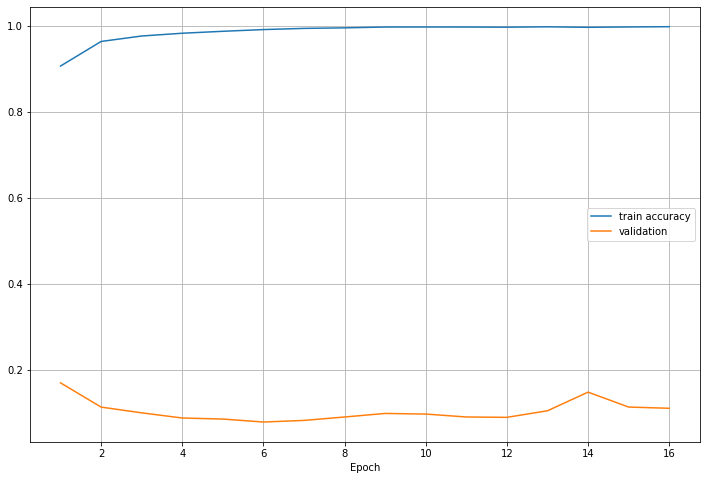

In [33]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()